In [23]:
#M2 TIDE 2023/2024

#TP1 Algorithmique & Python

#Groupe: BENSEFIA Walid / HADFI Ramy / MAHAMAT Elias

In [ ]:
''' 
Pour commencer, on téléchargé le tout premier fichier des données instantannées pour commencer à explorer 
la structure du fichier XML.

Après ceci, on a compris la structure de l'arborescence du fichier et on s'est rendu compte que le fichier de data instantannée
n'était pas le bon pour notre projet. Il a fallut télécharger tous les fichier des archives pour suivre ce process : 

1. Importer et lire le fichier
2. Se concentrer sur les noeuds (ou balise) des prix (car les autres noeuds tel que Services et Horaires de chaque PDV 
ne nous sont pas pertinents pour notre analyse )
3. Tirer les informations stockées dans les noeuds des prix sous format d'Attributs et non pas texte
4. Créer 2 séries temporelles (une pour Gazole et l'autre pour Sp95) 
6. SUIVRE LE MEME PROCESSUS POUR CHACUNE DES ANNEES (2007-2023)  : Utilisation d'une BOUCLE
7. Concatener le tout pour avoir 2 Séries Temporelles Finales (Gazole et Sp95) de 2007-2023
8. Remettre à l'echelle les données de 2022 (car pour les autres années : 1000= 1€)
9. Tracer le plot demandé



Vous allez recevoir en PJ une image d'un arborescence qui illustre notre compréhension de la structure des fichiers XML


PS: Pour exécuter ce code, veuillez mettre les fichiers XML d'un un meme dossier et modifier le chemin de ce dernier pour 
bien définir la variable "fichier_xml"

'''

In [5]:
import xml.etree.ElementTree as ET
import pandas as pd

# Création d'une liste pour stocker les DataFrames pour chaque année
dfs = []

# Boucle de 2007 à 2023 inclus
for annee in range(2007, 2023):
    # Construire le chemin du fichier XML pour cette année
    fichier_xml = f"C:/Users/wbensefia/Documents/M2 TIDE/Algo & Python/Nouveau dossier/PrixCarburants_annuel_{annee}.xml"

    # Analyser le fichier XML
    tree = ET.parse(fichier_xml)
    root = tree.getroot()

    # Créer une liste pour stocker les données
    data = []

    # Parcourir les éléments "pdv" du fichier XML
    for pdv in root.iter("pdv"):
        id_pdv = pdv.get("id")

        # Parcourir les éléments "prix" pour récupérer les prix et les dates
        for prix in pdv.iter("prix"):
            nom_carburant = prix.get("nom")
            maj = prix.get("maj")
            valeur = prix.get("valeur")

            # Ajouter les données à la liste
            data.append([id_pdv, nom_carburant, maj, valeur])

    # Créer le DataFrame pour cette année
    df = pd.DataFrame(data, columns=["ID_PDV", "Carburant", "DateMaj", "Prix"])

    # Supprimer les lignes avec des valeurs manquantes
    df.dropna(subset=['Carburant', 'DateMaj', 'Prix'], inplace=True)

    # Conversion des colonnes 'DateMaj' et 'Prix' en types appropriés
    df['DateMaj'] = pd.to_datetime(df['DateMaj'])
    df['Prix'] = df['Prix'].astype(float)

    # Filtrer le DataFrame pour "Gazole" et "SP95"
    gazole_series = df[df['Carburant'] == 'Gazole'][['DateMaj', 'Prix']]
    sp95_series = df[df['Carburant'] == 'SP95'][['DateMaj', 'Prix']]

    # Ajouter le DataFrame de cette année à la liste des DataFrames
    dfs.append((gazole_series, sp95_series))

# Maintenant, vous nous avons une liste de tuples de DataFrames pour chaque année de 2012 à 2022
# Chaque tuple contient les séries temporelles pour Gazole et SP95 pour une année donnée

In [17]:
import pandas as pd

# Créer des DataFrames vides pour Gazole et SP95
gazole_prices_df = pd.DataFrame(columns=["DateMaj", "Prix"])
sp95_prices_df = pd.DataFrame(columns=["DateMaj", "Prix"])

# Parcourir la liste dfs pour extraire les données de prix
for gazole_series, sp95_series in dfs:
    gazole_prices_df = gazole_prices_df.append(gazole_series, ignore_index=True)
    sp95_prices_df = sp95_prices_df.append(sp95_series, ignore_index=True)

# S'assurer que les colonnes sont du bon type
gazole_prices_df["DateMaj"] = pd.to_datetime(gazole_prices_df["DateMaj"])
gazole_prices_df["Prix"] = gazole_prices_df["Prix"].astype(float)
sp95_prices_df["DateMaj"] = pd.to_datetime(sp95_prices_df["DateMaj"])
sp95_prices_df["Prix"] = sp95_prices_df["Prix"].astype(float)

# Afficher les premières lignes des DataFrames
print("DataFrame pour Gazole :")
print(gazole_prices_df.head())

print("\nDataFrame pour SP95 :")
print(sp95_prices_df.head())



# S'assurer que l'index est un DatetimeIndex pour Gazole (utile pour la prochaine étape)
gazole_prices_df.set_index('DateMaj', inplace=True)

# S'assurer que l'index est un DatetimeIndex pour SP95
sp95_prices_df.set_index('DateMaj', inplace=True)




C:\Users\wbensefia\AppData\Local\Temp\ipykernel_18012\2059203310.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gazole_prices_df = gazole_prices_df.append(gazole_series, ignore_index=True)
C:\Users\wbensefia\AppData\Local\Temp\ipykernel_18012\2059203310.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sp95_prices_df = sp95_prices_df.append(sp95_series, ignore_index=True)


DataFrame pour Gazole :
                     DateMaj   Prix
0 2007-01-04 18:43:38.841521  999.0
1 2007-01-09 08:32:48.501587  999.0
2 2007-01-12 08:42:13.582039  989.0
3 2007-01-16 16:18:28.004618  988.0
4 2007-01-17 09:16:37.487625  988.0

DataFrame pour SP95 :
                     DateMaj    Prix
0 2007-01-04 18:43:38.852119  1170.0
1 2007-01-09 08:32:48.512439  1160.0
2 2007-01-12 08:42:13.593416  1148.0
3 2007-01-16 16:18:28.050892  1145.0
4 2007-01-17 09:16:37.490857  1139.0


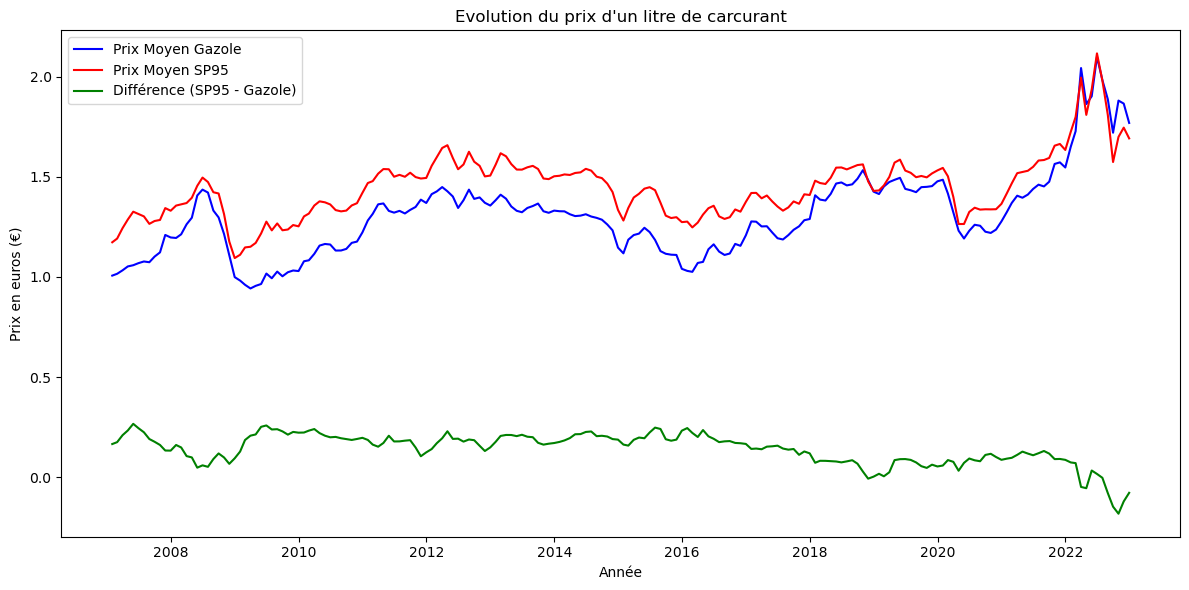

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rééchantillonnage par mois et calcul de la moyenne mensuelle pour Gazole
monthly_gazole_prices = gazole_prices_df.resample('M').mean()

# Rééchantillonnage par mois et calcul de la moyenne mensuelle pour SP95
monthly_sp95_prices = sp95_prices_df.resample('M').mean()

# Remettre à l'échelle les prix de 2022 en multipliant par 1000
monthly_gazole_prices.loc['2022']["Prix"] *= 1000
monthly_sp95_prices.loc['2022']["Prix"] *= 1000


monthly_gazole_prices["Prix"] /= 1000
monthly_sp95_prices["Prix"] /= 1000


# Calculer la différence (écart) entre SP95 et Gazole
price_difference = monthly_sp95_prices["Prix"] - monthly_gazole_prices["Prix"]

# Créer une figure et un ensemble d'axes
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer la série temporelle rééchantillonnée des prix mensuels pour Gazole
sns.lineplot(data=monthly_gazole_prices, x=monthly_gazole_prices.index, y="Prix" , label="Prix Moyen Gazole", color="blue", ax=ax)

# Tracer la série temporelle rééchantillonnée des prix mensuels pour SP95
sns.lineplot(data=monthly_sp95_prices, x=monthly_sp95_prices.index, y="Prix" , label="Prix Moyen SP95", color="red", ax=ax)

# Tracer la différence (écart) entre SP95 et Gazole
sns.lineplot(x=price_difference.index, y=price_difference.values, label="Différence (SP95 - Gazole)", color="green", ax=ax)

# Ajouter des titres et des légendes
ax.set_title("Evolution du prix d'un litre de carcurant")
ax.set_xlabel("Année")
ax.set_ylabel("Prix en euros (€)")
ax.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()
